# **Importing Dataset**

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
# Load the COIL-100 dataset from TensorFlow Datasets
ds, ds_info = tfds.load('coil100', split='train', with_info=True)

# **Data Preprocessing**

In [3]:
# Preprocess the data
def preprocess_data(sample):
    image = tf.cast(sample['image'], tf.float32) / 255.0  # Normalize pixel values
    label = tf.one_hot(sample['object_id'], depth=ds_info.features['object_id'].num_classes)
    return image, label

# Apply preprocessing to the dataset
ds = ds.map(preprocess_data)

In [4]:
# Split the data into training and validation sets
train_size = int(0.7 * ds_info.splits['train'].num_examples)
val_size = ds_info.splits['train'].num_examples - train_size
train_ds = ds.take(train_size)
val_ds = ds.skip(train_size)

# Batch and shuffle the datasets
batch_size = 32
train_ds = train_ds.batch(batch_size).shuffle(buffer_size=1000)
val_ds = val_ds.batch(batch_size)


In [5]:
models = []


# **Model Training**

In [6]:
# Model 1: Simple CNN
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(ds_info.features['object_id'].num_classes, activation='softmax')
])
models.append(model)

In [7]:
# Model 2: Deeper CNN
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(ds_info.features['object_id'].num_classes, activation='softmax')
])
models.append(model)

In [8]:
# Model 3: Using Transfer Learning (e.g., MobileNetV2)
base_model = tf.keras.applications.MobileNetV2(input_shape=(128, 128, 3), include_top=False, weights='imagenet')
base_model.trainable = False
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(ds_info.features['object_id'].num_classes, activation='softmax')
])
models.append(model)

9406464/9406464 [==============================] - 0s 0us/step


In [9]:
# Model 4: Customized MobileNetV2
base_model = tf.keras.applications.MobileNetV2(input_shape=(128, 128, 3), include_top=False, weights='imagenet')
base_model.trainable = False
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Adding dropout for regularization
    tf.keras.layers.Dense(ds_info.features['object_id'].num_classes, activation='softmax')
])
models.append(model)

In [11]:
# Model 5: VGG-16
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(ds_info.features['object_id'].num_classes, activation='softmax')
])
models.append(model)

In [12]:
# Model 6: ResNet-50
base_model = tf.keras.applications.ResNet50(input_shape=(128, 128, 3), include_top=False, weights='imagenet')
base_model.trainable = False
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(ds_info.features['object_id'].num_classes, activation='softmax')
])
models.append(model)

94765736/94765736 [==============================] - 0s 0us/step


In [13]:
# Model 7: InceptionV3
base_model = tf.keras.applications.InceptionV3(input_shape=(128, 128, 3), include_top=False, weights='imagenet')
base_model.trainable = False
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(ds_info.features['object_id'].num_classes, activation='softmax')
])
models.append(model)

87910968/87910968 [==============================] - 1s 0us/step


In [14]:
# Model 8: Ensemble of previous models
ensemble_inputs = tf.keras.Input(shape=(128, 128, 3))
outputs = [model(ensemble_inputs) for model in models[:7]]
ensemble_outputs = tf.keras.layers.average(outputs)
ensemble_model = tf.keras.Model(inputs=ensemble_inputs, outputs=ensemble_outputs)

In [15]:
# Compile and train all models
for i, model in enumerate(models):
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    print(f"\nTraining Model {i+1}:")
    model.fit(train_ds, epochs=10, validation_data=val_ds)

# Train the ensemble model
ensemble_model.compile(optimizer='adam',
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])
print("\nTraining Ensemble Model:")
ensemble_model.fit(train_ds, epochs=10, validation_data=val_ds)

# Evaluate all models on validation set
for i, model in enumerate(models):
    print(f"\nModel {i+1} Evaluation:")
    model.evaluate(val_ds)

# Evaluate ensemble model
print("\nEnsemble Model Evaluation:")
ensemble_model.evaluate(val_ds)


Training Model 1:
Epoch 1/10
158/158 [==============================] - 16s 52ms/step - loss: 1.7469 - accuracy: 0.6089 - val_loss: 0.2540 - val_accuracy: 0.9245
Epoch 2/10
158/158 [==============================] - 4s 20ms/step - loss: 0.0941 - accuracy: 0.9740 - val_loss: 0.0505 - val_accuracy: 0.9912
Epoch 3/10
158/158 [==============================] - 4s 24ms/step - loss: 0.0221 - accuracy: 0.9956 - val_loss: 0.0349 - val_accuracy: 0.9926
Epoch 4/10
158/158 [==============================] - 4s 24ms/step - loss: 0.0020 - accuracy: 0.9998 - val_loss: 0.0158 - val_accuracy: 0.9972
Epoch 5/10
158/158 [==============================] - 4s 20ms/step - loss: 0.0027 - accuracy: 0.9992 - val_loss: 0.0185 - val_accuracy: 0.9968
Epoch 6/10
158/158 [==============================] - 4s 20ms/step - loss: 5.0497e-04 - accuracy: 1.0000 - val_loss: 0.0135 - val_accuracy: 0.9963
Epoch 7/10
158/158 [==============================] - 4s 22ms/step - loss: 2.3572e-04 - accuracy: 1.0000 - val_loss: 0

[0.30913472175598145, 1.0]

# **Model Evaluation and Comparison**

In [16]:
import pandas as pd

# Initialize lists to store model names and accuracies
model_names = ["Simple CNN", "Deeper CNN", "MobileNetV2", "Customized MobileNetV2",
               "VGG-16", "ResNet-50", "InceptionV3", "Ensemble"]

# Initialize lists to store accuracies
accuracies = []

# Evaluate all models on validation set
for i, model in enumerate(models):
    print(f"\n{model_names[i]} Evaluation:")
    loss, accuracy = model.evaluate(val_ds)
    accuracies.append(accuracy)

# Evaluate ensemble model
print("\nEnsemble Model Evaluation:")
loss, ensemble_accuracy = ensemble_model.evaluate(val_ds)
accuracies.append(ensemble_accuracy)

# Create a DataFrame to display the results
results_df = pd.DataFrame({"Model": model_names, "Accuracy": accuracies})
print("\nAccuracy of Each Model:")
display(results_df)


Simple CNN Evaluation:
68/68 [==============================] - 1s 7ms/step - loss: 0.7349 - accuracy: 0.9759

Deeper CNN Evaluation:
68/68 [==============================] - 1s 8ms/step - loss: 0.6344 - accuracy: 0.9718

MobileNetV2 Evaluation:
68/68 [==============================] - 1s 17ms/step - loss: 8.7563e-05 - accuracy: 1.0000

Customized MobileNetV2 Evaluation:
68/68 [==============================] - 1s 16ms/step - loss: 1.7953e-04 - accuracy: 1.0000

VGG-16 Evaluation:
68/68 [==============================] - 3s 41ms/step - loss: 4.6641 - accuracy: 0.0060

ResNet-50 Evaluation:
68/68 [==============================] - 3s 36ms/step - loss: 5.0722 - accuracy: 0.3148

InceptionV3 Evaluation:
68/68 [==============================] - 2s 26ms/step - loss: 0.1269 - accuracy: 0.9898

Ensemble Model Evaluation:
68/68 [==============================] - 9s 129ms/step - loss: 0.3091 - accuracy: 1.0000

Accuracy of Each Model:


,Model,Accuracy
0,Simple CNN,0.975926
1,Deeper CNN,0.971759
2,MobileNetV2,1.000000
3,Customized MobileNetV2,1.000000
4,VGG-16,0.006019
5,ResNet-50,0.314815
6,InceptionV3,0.989815
7,Ensemble,1.000000


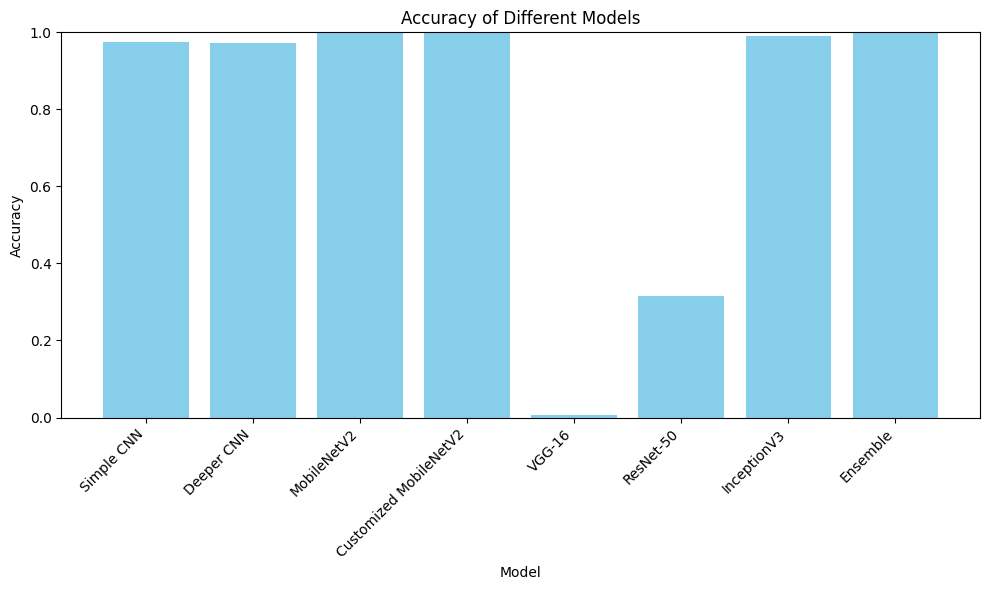

In [17]:
import matplotlib.pyplot as plt

# Plotting the model accuracies
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


Metrics for Simple CNN:
68/68 [==============================] - 1s 6ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        19
           2       0.91      1.00      0.95        21
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        27
           6       1.00      1.00      1.00        20
           7       1.00      0.84      0.91        25
           8       1.00      1.00      1.00        22
           9       1.00      1.00      1.00        26
          10       1.00      1.00      1.00        21
          11       1.00      1.00      1.00        19
          12       1.00      1.00      1.00        22
          13       1.00      1.00      1.00        23
          14       1.00      0.91      0.95        23
          15       1.00      1.00      1.00        24
          16       1.00      1.00      1.00        25
          17       1.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        19
           1       1.00      1.00      1.00        19
           2       1.00      0.76      0.86        21
           3       0.96      1.00      0.98        25
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        27
           6       1.00      1.00      1.00        20
           7       1.00      0.96      0.98        25
           8       1.00      1.00      1.00        22
           9       1.00      1.00      1.00        26
          10       1.00      1.00      1.00        21
          11       1.00      1.00      1.00        19
          12       1.00      1.00      1.00        22
          13       0.96      1.00      0.98        23
          14       0.78      0.91      0.84        23
          15       1.00      1.00      1.00        24
          16       1.00      1.00      1.00        25
          17       1.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.00      0.00      0.00        19
           2       0.00      0.00      0.00        21
           3       0.00      0.00      0.00        25
           4       0.00      0.00      0.00        21
           5       0.00      0.00      0.00        27
           6       0.00      0.00      0.00        20
           7       0.00      0.00      0.00        25
           8       0.00      0.00      0.00        22
           9       0.00      0.00      0.00        26
          10       0.00      0.00      0.00        21
          11       0.00      0.00      0.00        19
          12       0.00      0.00      0.00        22
          13       0.00      0.00      0.00        23
          14       0.00      0.00      0.00        23
          15       0.00      0.00      0.00        24
          16       0.00      0.00      0.00        25
          17       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.00      0.00      0.00        19
           2       0.00      0.00      0.00        21
           3       1.00      0.52      0.68        25
           4       0.17      1.00      0.29        21
           5       0.00      0.00      0.00        27
           6       0.71      1.00      0.83        20
           7       0.00      0.00      0.00        25
           8       0.28      0.55      0.37        22
           9       0.00      0.00      0.00        26
          10       0.39      1.00      0.56        21
          11       0.60      0.79      0.68        19
          12       0.00      0.00      0.00        22
          13       0.66      1.00      0.79        23
          14       0.00      0.00      0.00        23
          15       0.96      1.00      0.98        24
          16       0.00      0.00      0.00        25
          17       0.29    

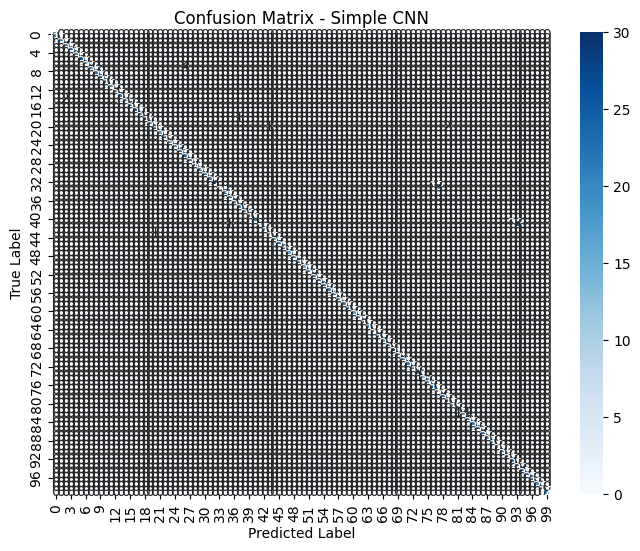

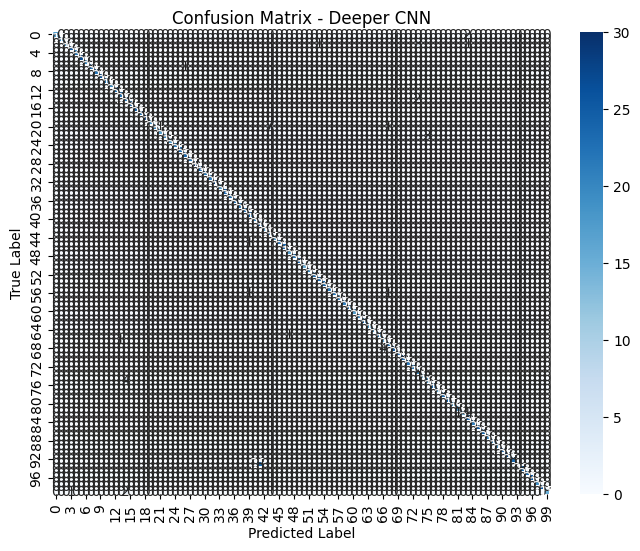

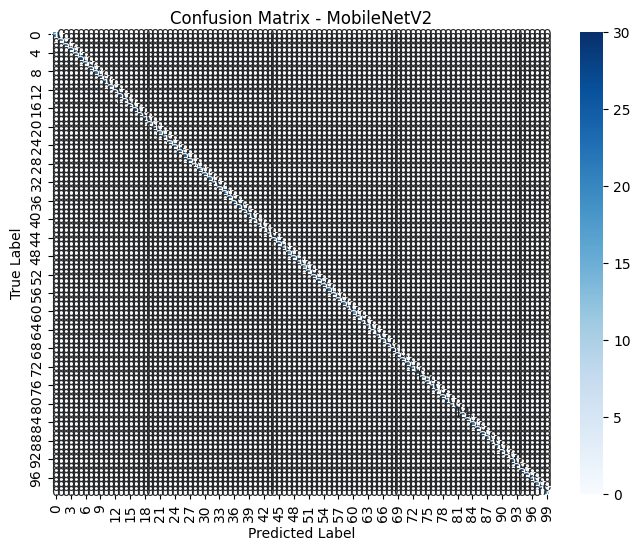

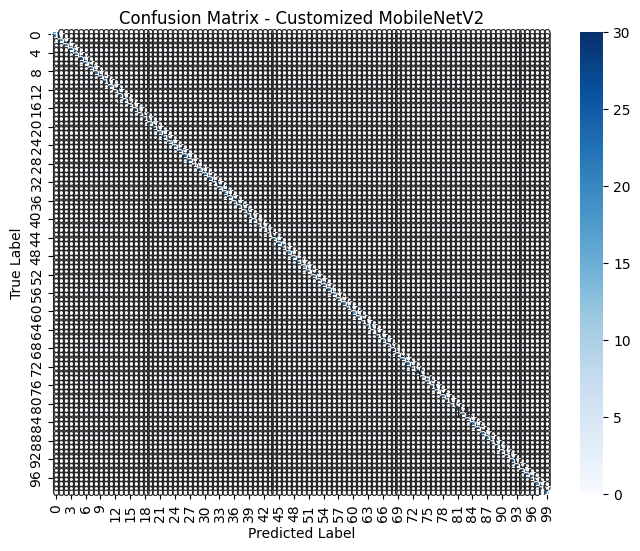

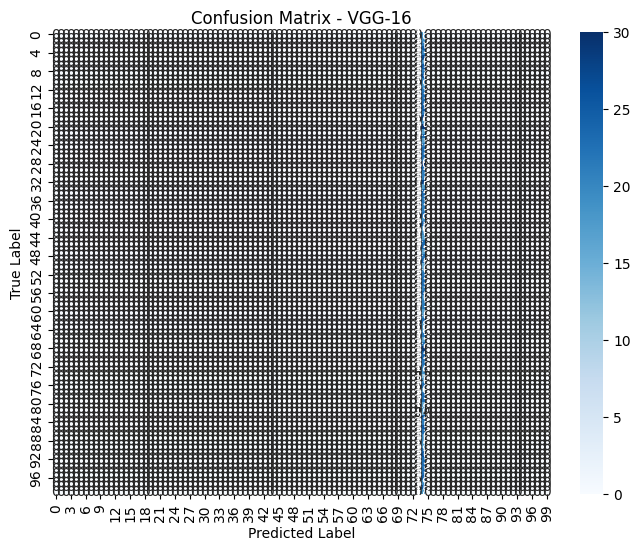

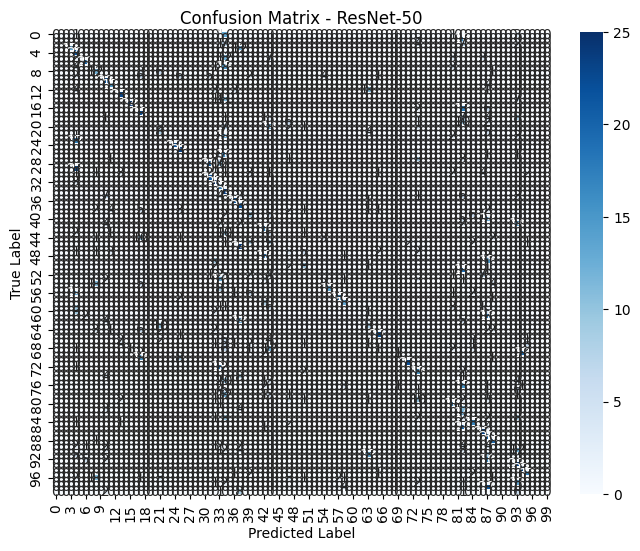

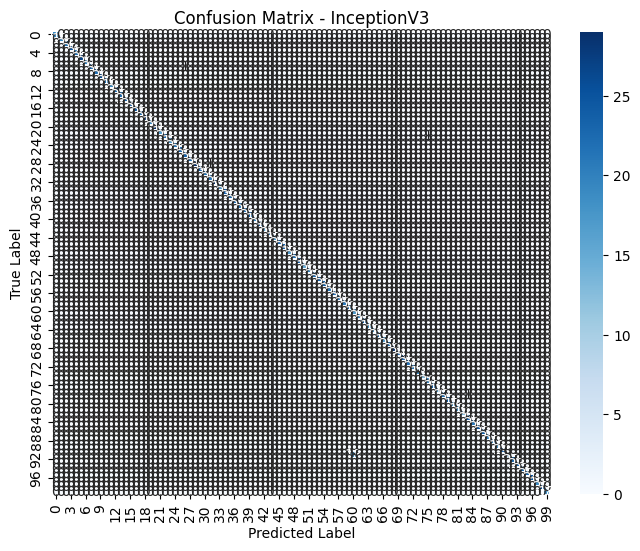

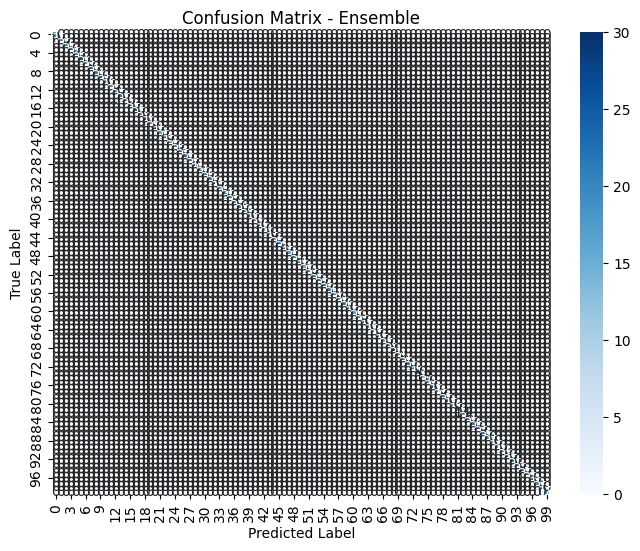

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Initialize lists to store metrics
precisions = []
recalls = []
f1_scores = []
conf_matrices = []

# Compute metrics for each model
for i, model in enumerate(models):
    print(f"\nMetrics for {model_names[i]}:")
    # Predict labels
    y_pred = model.predict(val_ds)
    # Get true labels
    y_true = []
    for _, labels in val_ds:
        y_true.extend(labels.numpy())
    y_true = [tf.argmax(label).numpy() for label in y_true]
    # Compute precision, recall, and F1 score
    report = classification_report(y_true, y_pred.argmax(axis=1), output_dict=True)
    print(classification_report(y_true, y_pred.argmax(axis=1)))
    precisions.append(report['weighted avg']['precision'])
    recalls.append(report['weighted avg']['recall'])
    f1_scores.append(report['weighted avg']['f1-score'])
    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred.argmax(axis=1))
    conf_matrices.append(conf_matrix)

# Compute metrics for ensemble model
print("\nMetrics for Ensemble Model:")
# Predict labels
y_pred_ensemble = ensemble_model.predict(val_ds)
# Compute precision, recall, and F1 score
report_ensemble = classification_report(y_true, y_pred_ensemble.argmax(axis=1), output_dict=True)
print(classification_report(y_true, y_pred_ensemble.argmax(axis=1)))
precisions.append(report_ensemble['weighted avg']['precision'])
recalls.append(report_ensemble['weighted avg']['recall'])
f1_scores.append(report_ensemble['weighted avg']['f1-score'])

# Compute confusion matrix
conf_matrix_ensemble = confusion_matrix(y_true, y_pred_ensemble.argmax(axis=1))
conf_matrices.append(conf_matrix_ensemble)

# Plotting correlation matrix for each model
for i, model_name in enumerate(model_names):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrices[i], annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()


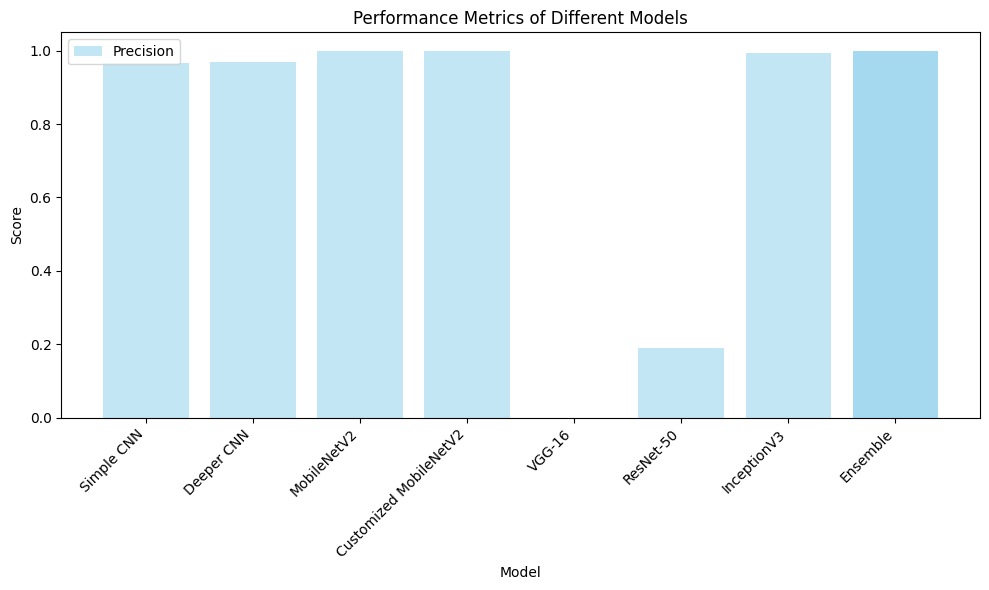

In [20]:
# Plotting precision, recall, and F1 score
plt.figure(figsize=(10, 6))
plt.bar(model_names + ['Ensemble'], precisions + [report_ensemble['weighted avg']['precision']], color='skyblue', alpha=0.5, label='Precision')
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Performance Metrics of Different Models')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

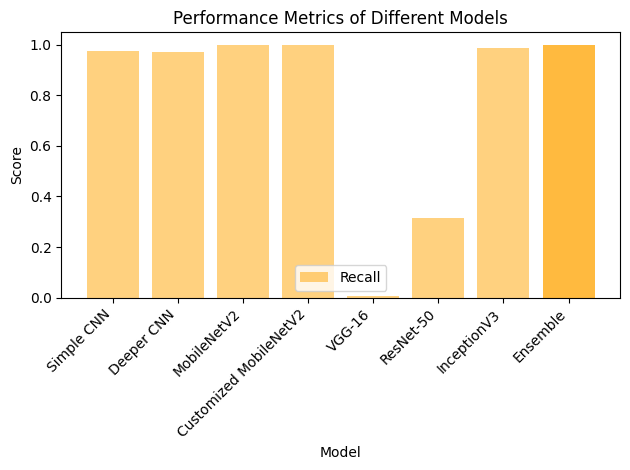

In [21]:
plt.bar(model_names + ['Ensemble'], recalls + [report_ensemble['weighted avg']['recall']], color='orange', alpha=0.5, label='Recall')
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Performance Metrics of Different Models')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

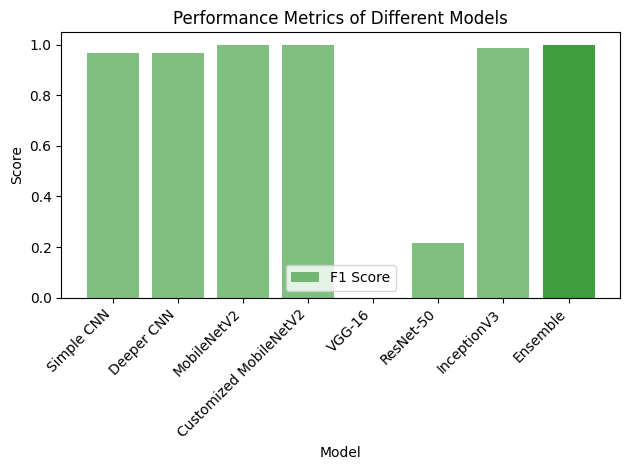

In [22]:
plt.bar(model_names + ['Ensemble'], f1_scores + [report_ensemble['weighted avg']['f1-score']], color='green', alpha=0.5, label='F1 Score')
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Performance Metrics of Different Models')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()